<a href="https://colab.research.google.com/github/AnushkaYeole21/Deep_Learning/blob/main/Perceptron_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(42)

In [ ]:
# Generate random data
data = {
    'cgpa': np.round(np.random.uniform(1.0, 10.0, 100), 2),  # CGPA between 1.0 and 10.0
    'resume_score': None,  # Placeholder for resume_score to calculate after CGPA
    'placed': None  # Placeholder for placed to calculate based on CGPA and resume_score
}

# Generate Resume Score based on CGPA
cgpa = data['cgpa']
resume_score = np.round(np.random.uniform(3, 9, 100) + (cgpa / 2), 2)  # Resume score influenced by CGPA

# Determine placement based on CGPA and Resume Score
placed = (cgpa >= 6) & (resume_score >= 6)  # Simple rule: CGPA >= 6 and Resume Score >= 6
placed = placed.astype(int)  # Convert to integers (0 or 1)

# Update data dictionary
data['resume_score'] = resume_score
data['placed'] = placed

In [ ]:
# Create the DataFrame
df = pd.DataFrame(data)

In [ ]:
df.to_csv("placement.csv", index = False)

In [ ]:
df = pd.read_csv("placement.csv")

In [ ]:
df.head()

,cgpa,resume_score,placed
0,8.15,9.21,1
1,5.52,10.31,0
2,6.19,6.18,1
3,5.43,6.41,0
4,2.76,4.66,0


In [ ]:
df.tail()

,cgpa,resume_score,placed
95,7.64,10.12,1
96,5.99,8.64,0
97,6.51,11.58,1
98,4.78,7.50,0
99,3.23,5.32,0


In [ ]:
count = (df['placed'] == 1).sum()
print(f"Number of rows where 'placed' is 1: {count}")

Number of rows where 'placed' is 1: 48


In [ ]:
df.shape

(100, 3)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

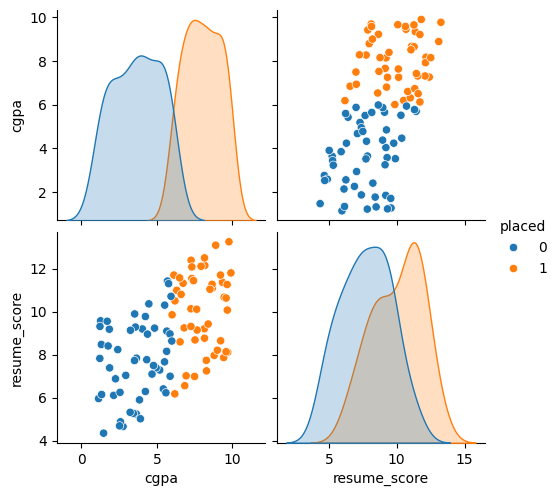

In [ ]:
# Pairplot for the DataFrame
sns.pairplot(df, vars=["cgpa", "resume_score"], hue="placed", diag_kind="kde")

# Show the plot
plt.show()

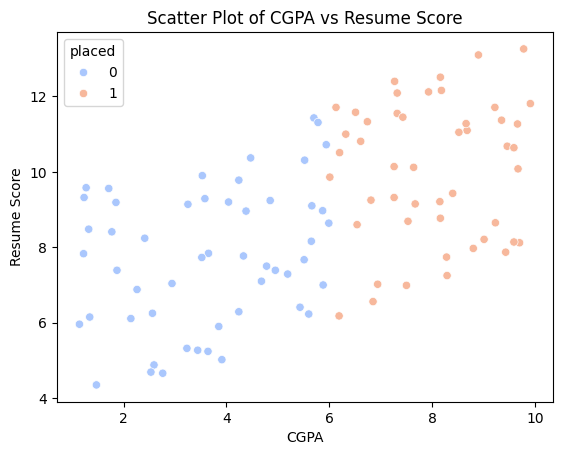

In [ ]:
# Plot the data
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=df, palette="coolwarm")
plt.title("Scatter Plot of CGPA vs Resume Score")
plt.xlabel("CGPA")
plt.ylabel("Resume Score")
plt.show()

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [ ]:
p.fit(X,y)

Perceptron()

In [ ]:
p.coef_

array([[ 47.33, -18.64]])

>Above W1= 47.33 and W2 = -18.64

In [ ]:
p.intercept_

array([-77.])

> b = -77.

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


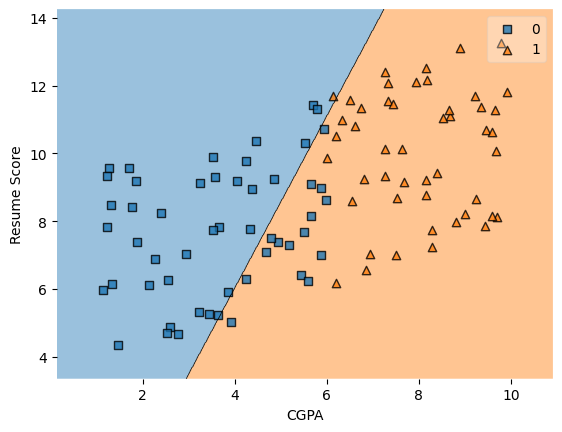

In [ ]:
plot_decision_regions(X.values, y.values, clf=p)
plt.xlabel("CGPA")
plt.ylabel("Resume Score")
plt.show()